# Математичке операције над NumPy низовима

<div>
   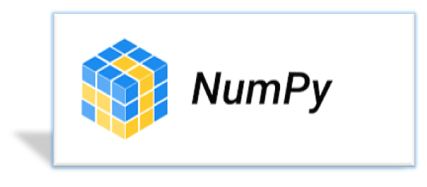  
</div>

**Садржај:**
1. [Векторски простори](#Векторски-простори)
1. [Операције над векторима и матрицама](#Операције-над-векторима-и-матрицама-у-NumPy-библиотеци)
    1. [Скалирање `*` и сабирање `+`](#Скалирање-и-сабирање-вектора-и-матрица)
    1. [Специјалне операције над NumPy низовима](#Специјалне-операције-над-NumPy-низовима)
        1. [Члан-по-члан аритметика](#Члан-по-члан-аритметика)
        1. [Бродкастинг](#Бродкастинг)
1. [Елементарне математичке функције модула NumPy](#Елементарне-математичке-функције-модула-NumPy)    

***

У овом одељку бавићемо се основним операцијама над NumPy низовима и начинима приступа појединим деловима низа.

In [1]:
import numpy as np
import numpy.random as rndm

Прве операције над низовима којима се бавимо су операције векторског простора. Због тога се подсећамо основних појмова из ове области.

***

## Векторски простори

**Дефиниција 1.** Уређена четворка $(V,\mathbb{K},+,\cdot),$ представља векторски простор над пољем $\mathbb{K}$ (vector space over field $\mathbb{K}$) уколико су дефинисане операције са особинама: 
1. $+:V\times V\to V,\quad (V,+)$ је Абелова група,
$$\begin{array}{ll}
\mbox{a)}&(\forall v,u,w\in V)\ v+(u+w)=(v+u)+w,\\[4pt]
\mbox{б)}& (\forall v,u\in V)\ v+u=u+v, \\[4pt]
\mbox{в)}&(\exists\theta\in V)(\forall v\in V)\ v+\theta=\theta+v=v\\[4pt]
\mbox{г)}&(\forall v\in V)(\exists-v\in V)\ v+(-v)=(-v)+v=\theta,
\end{array}$$

2. $\cdot:\mathbb{K}\times V\to V,\quad$
 $\forall v,u\in V$ и  $\forall \lambda,\mu\in\mathbb{K}\quad$ важе следеће једнакости
$$\begin{array}{ll}
\mbox{a)}&1\cdot v=v,\\[4pt]
\mbox{б)}& \lambda\cdot(\mu\cdot v)=(\lambda\cdot_{\mathbb{K}}\mu)v, \\[4pt]
\mbox{в)}&(\lambda+_{\mathbb{K}}\mu)\cdot v=\lambda\cdot v+\mu\cdot v\\[4pt]
\mbox{г)}&\lambda\cdot(v+u)=\lambda\cdot v+\lambda\cdot u,
\end{array}$$

***

Вектор $\theta$ зовемо **нула-вектор** (zero vector, null vector), и $-v$ је **супротан вектор** вектора $v$ (opposite vector). Елементе поља $\mathbb{K}$ зовемо **скаларима** (scalars). Операција $+$ је **сабирање вектора**, а операција $\cdot$ **множење вектора скаларом**. Операције сабирања и множења унутар поља $\mathbb{K}$ су у дефиницији 1 специјално наглашене као: $+_{\mathbb{K}}$ и $\cdot_{\mathbb{K}},$ мада их у наставку нећемо тако издвајати.  Из контекста ће се унутар математичких формула јасно видети о којој од операција  је реч. 

<div class="alert alert-block alert-info">
 Сваки векторски простор садржи <b> нула-вектор $\theta.$</b> </div>

Бавићемо се углавном векторским просторима када је $\mathbb{K}=\mathbb{R},$ тј. реалним векторским просторима. Мада ће повремено бити од интереса да анализирамо и комплексни случај, односно када је $\mathbb{K}=\mathbb{C}.$ Због тога су све дефиниције у наставку дате за реалне векторске просторе. Када комплексни буду имали неку другачију карактеристику у односу на реалан случај бавићемо се тим специфичностима.

***

## Операције над векторима и матрицама у NumPy библиотеци

Основне операције векторског простора подржане су у раду са NumPy низовима. Услови под којима су ове операције дефинисане односе се и на услове извршења одговарајућих операција из NumPy библиотеке.  

У наредној табели дат је преглед функција и метода из овог поднаслова радне свеске. Њима су подржане операције линеарне алгебре приликом рада са NumPy низовима. Исцрпна листа рутина може се наћи у [документационом центру](https://numpy.org/doc/stable/reference/routines.html) NumPy библиотеке.

|Операција|Симбол|Име на енглеском|
|---:|:---:|:---|
|Сабирање|`+`| Addition|
|Одузимање|`-`|Subtraction|
|Скалирање|`*`|Scaling|
|Транспоновање|`transpose()` ili `.T`|Transpose|

У наставку, кроз примере, приказаћемо како функционишу наведене функције. Осим тога, постоје и згодне кодне скраћенице за неке специјалне случајеве ових операција.

### Скалирање и сабирање вектора и матрица

Матрице осим што представљају табеле података или правоугаоне шеме бројева
$$ A=[a_{ij}]_{(m+1)\times(n+1)}=\begin{bmatrix} a_{00}&a_{01}&\dots&a_{0n}\\
a_{10}&a_{11}&\dots&a_{1n}\\ \vdots&\vdots & &\vdots \\ 
a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix},
$$
могу се третирати и као уређене $(m+1)\cdot(n+1)-$торке бројева.
Операције које скуп $\mathcal{M}_{(m+1)\times(n+1)},$ матрица реда $(m+1)\times(n+1),$ чине векторским простором су множење скаларом и сабирање две матрице. И над векторима и над матрицама ове операције се спроводе члан-по-члан.

**Скалирање**

\begin{align} &\lambda\cdot\begin{bmatrix} a_{0}\\a_{1}\\\vdots \\ a_{m}\end{bmatrix}
=\begin{bmatrix} \lambda a_{0}\\\lambda a_{1}\\\vdots\\\lambda a_{m}\end{bmatrix},
&& \lambda\cdot\begin{bmatrix} a_{00}&a_{01}&\dots&a_{0n}\\
a_{10}&a_{11}&\dots&a_{1n}\\\vdots&\vdots&&\vdots \\ 
a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix}
=\begin{bmatrix} \lambda a_{00}&\lambda a_{01}&\dots&\lambda a_{0n}\\
\lambda a_{10}&\lambda a_{11}&\dots&\lambda a_{1n}\\\vdots&\vdots&&\vdots \\ 
\lambda a_{m0}&\lambda a_{m1}&\dots&\lambda a_{mn}\end{bmatrix}
\end{align}

**Сабирање**
\begin{align} \begin{bmatrix} a_{0}\\a_{1}\\\vdots \\ a_{m}\end{bmatrix}
+\begin{bmatrix} b_{0}\\b_{1}\\\vdots \\ b_{m}\end{bmatrix}
&=\begin{bmatrix} a_{0}+b_{0}\\a_{1}+b_{1}\\\vdots \\ a_{m}+b_{m}\end{bmatrix},
\\
\begin{bmatrix} a_{00}&a_{01}&\dots&a_{0n}\\
a_{10}&a_{11}&\dots&a_{1n}\\\vdots&\vdots&&\vdots \\ 
a_{m0}&a_{m1}&\dots&a_{mn}\end{bmatrix}
+\begin{bmatrix} b_{00}&b_{01}&\dots&b_{0n}\\
b_{10}&b_{11}&\dots&b_{1n}\\\vdots&\vdots&&\vdots \\ 
b_{m0}&b_{m1}&\dots&b_{mn}\end{bmatrix}
&=\begin{bmatrix} a_{00}+b_{00}&a_{01}+b_{01}&\dots&a_{0n}+b_{0n}\\
a_{10}+b_{10}&a_{11}+b_{11}&\dots&a_{1n}+b_{1n}\\\vdots&\vdots&&\vdots \\ 
a_{m0}+b_{m0}&a_{m1}+b_{m1}&\dots&a_{mn}+b_{mn}\end{bmatrix}
\end{align}

Множење свих елемената NumPy низа једним бројем, реалним или комплексним, врши се симболом `*`. То важи како за једнодимензионалне NumPy низове, тако и за оне са више димензија.

**Пример 1.** Применићемо скалирање на једнодимензионални и дводимензионални NumPy низ са малим бројем компоненти како би лакше приметили дејство оператора `*`.

In [2]:
u=np.array([1,0,1,-1])
2*u

array([ 2,  0,  2, -2])

In [3]:
(1+1j)*u

array([ 1.+1.j,  0.+0.j,  1.+1.j, -1.-1.j])

In [4]:
A=(np.arange(1,7)).reshape(2,3)
print(A)
-2.3*A

[[1 2 3]
 [4 5 6]]


array([[ -2.3,  -4.6,  -6.9],
       [ -9.2, -11.5, -13.8]])

In [5]:
A/3

array([[0.33333333, 0.66666667, 1.        ],
       [1.33333333, 1.66666667, 2.        ]])

Када користимо основне аритметичке операције над NumPy низовима, треба водити рачуна о типу података унутар њих. Уколико су елемeнти низа цели бројеви повремено може да се догоди да израчунавања над тим низовима буду преведена у целобројне операције. Због тога, у нумеричкој обради података боље је користити `float` тип. То можемо да постигнемо додатном дефиницијом типа, или додавањем децималне тачке вредности код бар једног елемента низа.

In [6]:
(np.array([1,0])).dtype , (np.array([1,0.])).dtype

(dtype('int32'), dtype('float64'))

In [7]:
u.dtype, (-3.*u).dtype , (np.array([1,0],dtype=np.float16)).dtype

(dtype('int32'), dtype('float64'), dtype('float16'))

Сабирање елемената (члан-по-члан) два NumPy низа извршава се операцијом `+`. 

In [8]:
print(u)
v=np.array([2,-1,2,1])
u+v                       #sabiranje vektora

[ 1  0  1 -1]


array([ 3, -1,  3,  0])

In [9]:
np.array([1,2,3])+np.array([1,2])  #dimenzije se ne poklapaju

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [10]:
B=rndm.randint(-3,3,(2,3))
B

array([[ 0,  0,  2],
       [ 0,  1, -2]])

In [11]:
A+B

array([[1, 2, 5],
       [4, 6, 4]])

In [12]:
A+rndm.randint(-3,3,(3,2))  #dimenzije se ne poklapaju

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

***

**Линеарна комбинација** (linear combination) вектора добија се коначном применом основних операција над њима $$\lambda_0 v_0+\lambda_1 v_1+\dots+\lambda_k v_k,\qquad\lambda_i\in\mathbb{R}.$$
Линеарне комбинације можемо да спроводимо над NumPy низовима било kоје димензионалности, докле год су сви сабирци истог типа. У контексту ове радне свеске, линеарне комбинације се рачунају над векторима или над матрицама.

In [13]:
u-v                       #oduzimanje vektora

array([-1,  1, -1, -2])

In [14]:
1j*u+2.4*v             #linearna kombinacija vektora

array([ 4.8+1.j, -2.4+0.j,  4.8+1.j,  2.4-1.j])

In [15]:
C=np.array([[-1,0,1],[2,3.1,-1]])
-A+3*C      #linearna kombinacija matrica

array([[-4. , -2. ,  0. ],
       [ 2. ,  4.3, -9. ]])

<div class="alert alert-block alert-info">
<b>Закључак:</b> За сабирање NumPy низова неопходно је да они буду истих димензија. </div>

***

Основни појмови векторских простора који се граде на линеарним комбинацијама јесу линеарна независност, база и димензија. У наставку се подсећамо ових термина.

**Дефиниција 2.** Скуп вектора $\{v_0,v_1,\dots,v_k\}$ је **линеарно независан** (linearly independent) уколико $\forall \lambda_0,\lambda_1,\dots,\lambda_k\in\mathbb{R}$  важи
	$$\lambda_0v_0+\lambda_1v_1+\dots+\lambda_kv_k=\theta\quad\Longrightarrow\quad
	\lambda_0=\lambda_1=\dots=\lambda_k=0.$$

За празан скуп вектора $\emptyset$ договор је да га сматрамо линеарно независним. 
 
Скуп вектора који није линеарно независан је линеарно зависан.

**Задатак 1.** Израчунати $v_1+v_2+v_3,$  ако су
	$$v_1=\begin{bmatrix} 1\\2\\3\end{bmatrix},\qquad v_2=\begin{bmatrix} -3\\1\\-2\end{bmatrix},\qquad
	v_3=\begin{bmatrix} 2\\-3\\-1\end{bmatrix}.$$ Да ли су $v_1,v_2,v_3$ линеарно независни вектори?

**Решење :**


In [16]:
v1=np.array([1,2,3])
v2=np.array([-3,1,-2])
v3=np.array([2,-3,-1])
v1+v2+v3

array([0, 0, 0])

Вектори су линеарно зависни с обзиром да нетривијална линеарна комбинација даје нула-вектор.

***

Појам линеарне независности дефинише се и за бесконачне скупове вектора.

**Дефиниција 3.** Скуп вектора $S$ (коначан или бесконачан) је **линеарно независан** ако је савки његов коначан подскуп линеарно независан скуп.

**Дефиниција 4.** Скуп свих линеарних комбинација вектора $\{v_0,v_1,\dots,v_k\}$ је **линеал** (span) над њима, у ознаци $\mathcal{L}(v_0,v_1,\dots,v_k),$
$$\mathcal{L}(v_0,v_1,\dots,v_k)=\big\{\lambda_0v_0+\lambda_1v_1+\dots+\lambda_kv_k\ |\ \lambda_0,\lambda_1,\dots,\lambda_k\in\mathbb{R}\big\}.$$

Линеал или **линеарно затварање** дефинише се за произвољно велике скупове вектора, не само канчне скупове.

**Дефиниција 5.** Линеарно затварање скупа $S\subseteq V$ је скуп свих коначних линеарних комбинација вектора скупа $S,$ у ознаци $\mathcal{L}(S),$
$$\mathcal{L}(S)=\big\{\lambda_0v_0+\lambda_1v_1+\dots+\lambda_kv_k\ |\ \lambda_i\in\mathbb{R},\ v_i\in S,\ k\in\mathbb{N}\big\}.$$

**Дефиниција 6.** Скуп вектора $\{v_0,v_1,\dots,v_k\}\subset V$ је **потпун** (spanning set) уколико 
$$(\forall v\in V)\  (\exists\lambda_0,\lambda_1,\dots,\lambda_k\in\mathbb{R})$$ тако да је
	$$v=\lambda_0v_0+\lambda_1v_1+\dots+\lambda_kv_k\tag{1}.$$
    $$\Longleftrightarrow\quad V=\mathcal{L}(v_0,v_1,\dots,v_k).$$

**Дефиниција 7.** Скуп вектора $S\subseteq V$ је потпун у $V$ ако важи
$$V=\mathcal{L}(S).$$

**Дефиниција 8.** Сваки потпун, линеарно независан скуп вектора простора $V$ представља базу (basis) у $V.$ Број елемената произвољне базе зовемо димензија (dimension) простора $V$ и означавамо је са ${\rm dim}(V).$

Када векторски простор поседује базу од коначно много вектора зовемо га **коначнодимензионалан**. У наставку се бавимо таквим просторима.

Ако су вектори $\{v_0,v_1,\dots,v_k\}\subset V$ база векторског простора $V,$ тада су скалари $\lambda_0,\lambda_1,\dots,\lambda_k$ у једначини $(1)$ координате вектора $v$ у односу на ову базу. Димензија простора $V$ је тада $k+1,$ што бележимо са $\dim(V)=k+1.$ 

**Пример 2.** За тривијалан векторски простор $V=\{\theta\}$ уводи се конвенција $V=\mathcal{L}(\emptyset).$ Тада празан скуп представља базу $V,$ јер је према договору празан скуп вектора линеарно независан. Тако је и 
$${\rm dim}(\{\theta\})=0.$$

**Пример 3.** Линеарна комбинација вектора $v=\begin{bmatrix}1&2\end{bmatrix}$ и $u=\begin{bmatrix}-1&1\end{bmatrix}$ је сваки од наредних израза:
$$3\,v+2\,u,\quad -2\,v+u,\quad \sqrt{3}\,v-2\,u,\quad 0\,v+0\,u,\dots$$
Линеарне комбинације рачунањем постају конкретни вектори.

In [17]:
v=np.array([1,2])
u=np.array([-1,1])
w1=3*v+2*u
w1

array([1, 8])

In [18]:
w2=-2*v+u
w2

array([-3, -3])

In [19]:
w3=np.sqrt(3)*v-np.sqrt(2)*u
w3

array([3.14626437, 2.04988805])

In [20]:
teta=0*u+0*v
teta

array([0, 0])

Вектори $w_1,w_2,w_3$ добијени су као конкретне линеарне комбинације. Због тога за ове линеарне комбинациј екажемо да су представљање вектора $w_1,w_2,w_3$ преко вектора $u$ и $v.$ Линеарне комбинације вектора се краће записују матричним множењем.

In [21]:
A=np.block([v.reshape(2,1),u.reshape(2,1)])
A

array([[ 1, -1],
       [ 2,  1]])

In [22]:
lamda1=np.array([3,2])
w1=A@lamda1
w1

array([1, 8])

Када је представљање било ког вектора $w$ јединствено, вектори који учествују у линеарној комбинацији су линеарно независни. У супротном су линеарно зависни. 
$$(\exists!\lambda_i,\ i=\overline{0,k})\quad w=\lambda_0v_0+\lambda_1v_1+\dots+\lambda_kv_k
\quad\Longrightarrow\quad v_0,v_1,\dots,v_k
\mbox{ су линеарно независни}$$
$$(\exists!\lambda_i,\ i=\overline{0,k})\quad w=
\left[\begin{array}{c|c|c|c}
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}\\
v_0&v_1&\dots&v_k\\
\phantom{W}&\phantom{W}&\phantom{W}&\phantom{W}
\end{array}\right]
\begin{bmatrix}\lambda_0\\\lambda_1\\\vdots\\\lambda_k\end{bmatrix}
\quad\Longrightarrow\quad v_0,v_1,\dots,v_k
\mbox{ су линеарно независни}$$
Решавањем система линеарних једначина можемо да проверимо јединственост представљања вектора $w.$

Овакав приступ примењен је на $w1$ и његово представљање преко $u$ и $v.$

In [23]:
lamda=np.linalg.solve(A,w1)
lamda

array([3., 2.])

In [24]:
lamda1=np.array([3,2])
w1=A@lamda1
w1

array([1, 8])

Исти приступ примењен је на нула-вектор $teta$ и његово представљање преко $u$ и $v.$

In [25]:
lamda=np.linalg.solve(A,teta) 
lamda

array([ 0., -0.])

Закључујемо да и један и други вектор имају јединствено представљање преко $u$ и $v.$ Ови вектори су линеарно независни.

 Пказаћемо сада линеарну зависност вектора $v$ и $-v.$

In [26]:
A=np.block([v.reshape(2,1),-v.reshape(2,1)])
A

array([[ 1, -1],
       [ 2, -2]])

In [27]:
lamda=np.linalg.solve(A,teta)
lamda

LinAlgError: Singular matrix

Добијамо поруку грешке, тј. немогућност решења овог система једначина са објашњењем да је матрица система $A$ сингуларна. Тако препознајемо линеарно зависне колоне матрице $A.$ 

Постоји још једна битна разлика између скупова вектора $\{v,u\}$ и $\{v,-v\}.$ Сви вектори простора $\mathbb{R}^2$ могу да се представе линеарним комбинацијама вектора скупа $\{v,u\}.$ Због тога је он потпун скуп за овај простор, па представља базу. Други скуп $\{v,-v\}$ нема ни особину потпуности.  Скуп $\{v,-v,u\}$ јесте потпун, али и даље није линеарно независан јер садржи линеарно зависан подскуп.

***

<div class="alert alert-block alert-info">
Сваки потпун, линеарно независан скуп вектора коначнодимензионалног простора $V$ predstavlja <b> базу </b> у $V.$ Број елемената произвољне базе простора $V$ је увек исти и зовемо га  <b> димензија </b> простора $V,$ у ознаци ${\rm dim}(V).$ 
    
Када је $\dim(V)=n$ за векторски простор $V$ кажемо да је <b>$n-$димензионалан</b>.
    
За базу $(b)\ :\ \{b_0,b_1,\dots,b_{n-1}\}$ и вектор $w$ који има представљање $$w=\alpha_0b_0+\alpha_1b_1+\dots+\alpha_{n-1}b_{n-1},$$
коефицијенти $\alpha_0,\alpha_1,\dots,\alpha_{n-1}$ су <b> координате вектора </b> $w$ у односу на базу $(b).$    
</div>

**Теорема 1.** 
- Ако је скуп од $n$ вектора $n-$димензионалног простора $V$ линеарно неззависан, онда тај скуп вектора представља базу у $V.$ 
- Ако је скуп од $n$ вектора $n-$димензионалног простора $V$ потпун, онда је тај скуп база у $V.$

***

### Специјалне операције над NumPy низовима

Осим стандардних операција векторског простора, NumPy омогућава још неке члан-по-члан операције. То значи да постоје програмске скраћенице којима се операције и функције могу примењивати једним позивом на све елементе NumPy низа.  Поред тога, NumPy поседује и својство [бродкастинга](https://numpy.org/devdocs/user/basics.broadcasting.html) над низовима. Тај поступак подразумева довођење два низа на исти облик како би нека члан-по-члан операција могла да буде спроведена. Бродкастинг приступ омогућава у неким ситуацијама меморијски ефикаснију имплементацију кода.

Термин бродкастинг описује како се NumPy опходи према низовима различитих облика (shapes) приликом извођења аритметичких операција. Под одређеним условима, мањи низ се бродкастује (проширује се својим копијама) преко већег низа тако да им облици буду компатибилни. Бродкастинг је још једно средство векторизације операција над низовима. Није ограничено на два низа.

#### Члан-по-члан аритметика

**Пример 4.** Попут члан-по-члан сабирања матрица и низова, могуће је спровести и члан-по-члан множење, дељење или степеновање низова. Стандардне ознаке ових операција над бројевима се користе у исте сврхе за операције над низовима.

In [28]:
u=np.array([1,0,1,-1])
v=np.array([2,-1,2,1])
print("u=",u)
print("v=",v)
u*v        #član-po-član množenje elemenata, tj. Adamarov proizvod matrica

u= [ 1  0  1 -1]
v= [ 2 -1  2  1]


array([ 2,  0,  2, -1])

In [29]:
u/v        #član-po-član deljenje elemenata

array([ 0.5, -0. ,  0.5, -1. ])

In [30]:
u//v        #član-po-član celobrojno deljenje elemenata

array([ 0,  0,  0, -1])

In [31]:
u%v        #član-po-član ostaci pri deljenju 

array([1, 0, 1, 0])

In [32]:
v**u   #problem sa nizovima celobrojnih elemenata

ValueError: Integers to negative integer powers are not allowed.

In [33]:
v.astype(float)**u

array([2., 1., 2., 1.])

***

**Пример 5.** Описане члан-по-члан аритметичке операције спровешћемо над матрицама.

In [34]:
matrica=np.arange(1,7).reshape(2,3)
print(matrica)
print(matrica+2)  #dodavanje istog broja svim elementima matrice

[[1 2 3]
 [4 5 6]]
[[3 4 5]
 [6 7 8]]


In [35]:
A=np.array([[1,2,3],[3,2,1],[1,0,1]])
B=np.array([[1,-1,2],[1,-2,1],[4,1,2]])
print("A*B=",A*B)     #član-po-član množenje elemenata
print("A/B=",A/B)     #član-po-član deljenje elemenata
print("A//B=",A//B)     #član-po-član celobrojno deljenje elemenata
print("A%B=",A%B)     #član-po-član ostatak

A*B= [[ 1 -2  6]
 [ 3 -4  1]
 [ 4  0  2]]
A/B= [[ 1.   -2.    1.5 ]
 [ 3.   -1.    1.  ]
 [ 0.25  0.    0.5 ]]
A//B= [[ 1 -2  1]
 [ 3 -1  1]
 [ 0  0  0]]
A%B= [[0 0 1]
 [0 0 0]
 [1 0 1]]


In [36]:
B**A

array([[1, 1, 8],
       [1, 4, 1],
       [4, 1, 2]])

***

#### Бродкастинг

Бродкастинг аритметичких операција дешава се када низови над којима се позивају ове операције нису истих димензија. 

**Пример 6.** Најједноставнији пример бродкастинга је додавање једне исте вредности свим елементима низа. Ова операција не мора да се кодира кроз збир два низа, као што показује наредна кодна ћелија.

In [37]:
print(u)
u+4, 4+u       #dodavanje iste vrednosti svim elementima niza

[ 1  0  1 -1]


(array([5, 4, 5, 3]), array([5, 4, 5, 3]))

Претходна кодна скраћеница еквивалентна је наредном коду. Дошло је до бродкастовања скалара у низ истих вредности. Скалар је копиран у низ исте димензије као први сабирак.

In [38]:
u+4*np.ones(4,)

array([5., 4., 5., 3.])

И остале члан-по-члан аритметичке операције се на исти начин третирају.

In [39]:
v=np.arange(6)
print(v)

[0 1 2 3 4 5]


In [40]:
v//2

array([0, 0, 1, 1, 2, 2], dtype=int32)

In [41]:
v%3

array([0, 1, 2, 0, 1, 2], dtype=int32)

In [42]:
v**2

array([ 0,  1,  4,  9, 16, 25])

In [43]:
v**(3/4)

array([0.        , 1.        , 1.68179283, 2.27950706, 2.82842712,
       3.34370152])

In [44]:
2.3**v

array([ 1.     ,  2.3    ,  5.29   , 12.167  , 27.9841 , 64.36343])

Исти принцип се примењује и за низове са више димензија.

In [45]:
print(B)
print(1/B)   #matrica reciprocnih vrednosti

[[ 1 -1  2]
 [ 1 -2  1]
 [ 4  1  2]]
[[ 1.   -1.    0.5 ]
 [ 1.   -0.5   1.  ]
 [ 0.25  1.    0.5 ]]


In [46]:
print(A)
A**2

[[1 2 3]
 [3 2 1]
 [1 0 1]]


array([[1, 4, 9],
       [9, 4, 1],
       [1, 0, 1]])

***

**Пример 7.** Упознаћемо принцип бродкастовања приликом аритметичких операција између једнодимензионалних низова различитих дужина. 

Сабирање вектора-врсте $v\in\mathcal{M}_{1\times n}$ и вектора-колоне $u\in\mathcal{M}_{m\times 1},$ због бродкастинга за резултат даје матрицу типа $\mathcal{M}_{m\times n}.$

In [47]:
u , v

(array([ 1,  0,  1, -1]), array([0, 1, 2, 3, 4, 5]))

In [48]:
u+v

ValueError: operands could not be broadcast together with shapes (4,) (6,) 

In [49]:
u.reshape(4,1) , v.reshape(1,6)

(array([[ 1],
        [ 0],
        [ 1],
        [-1]]),
 array([[0, 1, 2, 3, 4, 5]]))

In [50]:
u.reshape(4,1)+v.reshape(1,6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [-1,  0,  1,  2,  3,  4]])

In [51]:
v.reshape(1,6)+u.reshape(4,1)

array([[ 1,  2,  3,  4,  5,  6],
       [ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [-1,  0,  1,  2,  3,  4]])

Да би се бродкастинг покренуо довољно је да само један од вектора добије вертикалну компоненту, тј. да постане дводимензионални низ.

In [52]:
u.reshape(4,1)+v

array([[ 1,  2,  3,  4,  5,  6],
       [ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [-1,  0,  1,  2,  3,  4]])

In [53]:
v+u.reshape(4,1)

array([[ 1,  2,  3,  4,  5,  6],
       [ 0,  1,  2,  3,  4,  5],
       [ 1,  2,  3,  4,  5,  6],
       [-1,  0,  1,  2,  3,  4]])

Бродкастинг је применљив и у случају вектора истих дужина. Иницира се вертикалном компонентом једног од њих.

In [54]:
u=np.array([1,0,1,-1])
v=np.array([2,-1,2,1])
u+v

array([ 3, -1,  3,  0])

In [55]:
u.reshape(4,1)+v

array([[ 3,  0,  3,  2],
       [ 2, -1,  2,  1],
       [ 3,  0,  3,  2],
       [ 1, -2,  1,  0]])

In [56]:
v+u.reshape(4,1)

array([[ 3,  0,  3,  2],
       [ 2, -1,  2,  1],
       [ 3,  0,  3,  2],
       [ 1, -2,  1,  0]])

У приказаним случајевима бродкастинг је направио копије целих вектора $v$ и $u$ у смеровима димензија ширине $1.$ 

<div>
   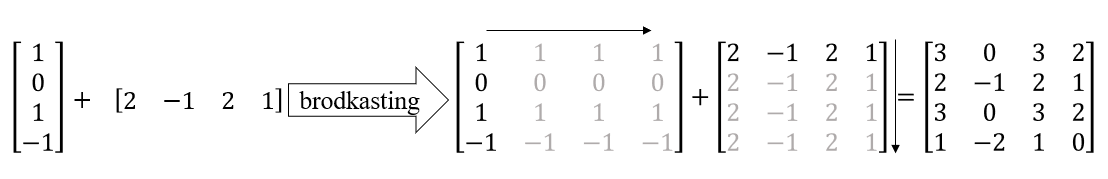  
</div>

Аналогно понашање испољава се и код примене осталих аритметичких операција између вектора-врста и вектора-колона.

<div>
   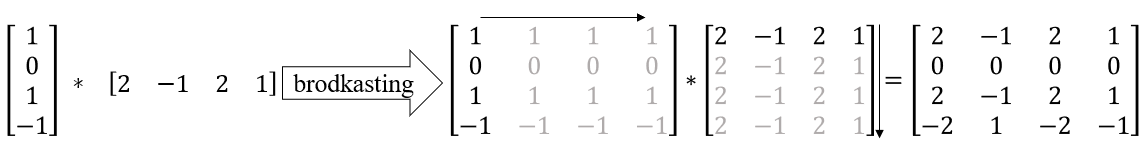  
</div>

In [57]:
u.reshape(4,1)*v.reshape(1,4)

array([[ 2, -1,  2,  1],
       [ 0,  0,  0,  0],
       [ 2, -1,  2,  1],
       [-2,  1, -2, -1]])

<div>
   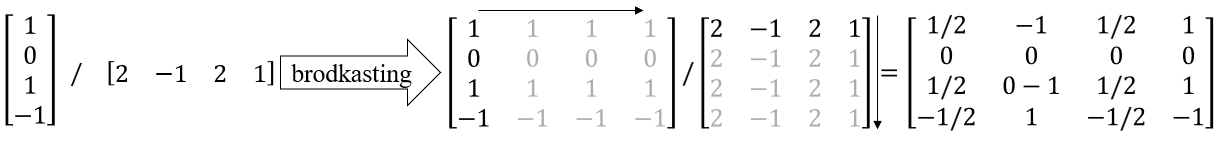  
</div>

In [58]:
u.reshape(4,1)/v.reshape(1,4)

array([[ 0.5, -1. ,  0.5,  1. ],
       [ 0. , -0. ,  0. ,  0. ],
       [ 0.5, -1. ,  0.5,  1. ],
       [-0.5,  1. , -0.5, -1. ]])

In [59]:
w=np.array([0,1,2,3,4])
v.reshape(4,1)**w

array([[ 1,  2,  4,  8, 16],
       [ 1, -1,  1, -1,  1],
       [ 1,  2,  4,  8, 16],
       [ 1,  1,  1,  1,  1]])

***

**Пример 8.** Члан-по-члан аритметичке операције између пуних дводимезионалних и једнодимензионалних низова понашају се на сличан начин претходном примеру. Једнодимензионални низ се копира у довољан број примерака у смеру димензије ширине 1. 

У свим кодним ћелијама у наставку леви или десни операнд може да буде NumPy низ. Листе су постављене због краћег куцања.

<div>
   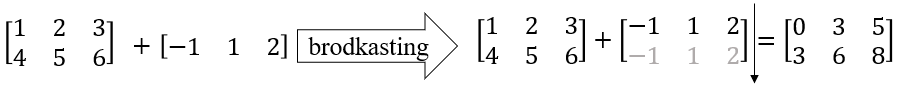  
</div>

In [60]:
matrica+np.array([-1,1,2])  #zbog poklapanja dimenzija vršiće se dodavanje elemenata desne liste 
#svakoj vrsti matrice

array([[0, 3, 5],
       [3, 6, 8]])

In [61]:
[-1,-1,2]+matrica  #zbog poklapanja dimenzija vršiće se dodavanje elemenata leve liste svakoj vrsti matrice

array([[0, 1, 5],
       [3, 4, 8]])

In [62]:
matrica+np.array([-1,-1,2])

array([[0, 1, 5],
       [3, 4, 8]])

<div>
   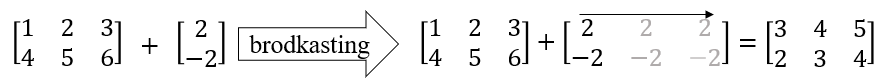  
</div>

In [63]:
matrica+[[2],[-2]] #zbog poklapanja dimenzija vršiće se dodavanje elemenata desne liste svakoj koloni matrice

array([[3, 4, 5],
       [2, 3, 4]])

In [64]:
matrica+np.array([[2],[-2]])

array([[3, 4, 5],
       [2, 3, 4]])

Аналогно се третирају и операције `*` , `/`, итд.

In [65]:
matrica*np.array([-1,-2,2.3]) #pokomponentno množenje liste i svake kolone matrice

array([[ -1. ,  -4. ,   6.9],
       [ -4. , -10. ,  13.8]])

Иначе, степеновање се спроводи и помоћу NumPy функције `power`. За два низа једнаких димензија `power` израчунава вредности првог низа степеноване на вредности другог низа (члан-по-члан).

In [66]:
osnove=np.array([2,-2,3,1,0])
stepeni=np.array([4,3,2,10,16])
np.power(osnove, stepeni)

array([16, -8,  9,  1,  0])

Функција `power` такође дозвољава бродкастинг. Битно је да унети низови имају врсте истих дужина.

In [67]:
osnove=np.array([2,-2,3,1,0])
stepeni=np.array([[4,3,2,10,16],[1,2,3,4,5]])
np.power(osnove, stepeni)

array([[16, -8,  9,  1,  0],
       [ 2,  4, 27,  1,  0]])

In [68]:
osnove=np.array([[2,-2,3,1,0],[-1,1,-2,2,-3]])
stepeni=np.array([4,3,2,10,16])
np.power(osnove, stepeni)

array([[      16,       -8,        9,        1,        0],
       [       1,        1,        4,     1024, 43046721]])

***

## Елементарне математичке функције модула NumPy

Елементарне математичке функције имплементране су као стандардне [функције](https://numpy.org/doc/stable/reference/routines.math.html) модула NumPy. Све оне имају карактеристике члан-по-члан примене, а подразумевају векторизацију израчунавања над елементима низа. Наредна табела даје преглед неких најзначајнијих математичких функција имплементираних унутар модула NumPy.

|Функција|име у имплементацији|Функција|име у имплементацији|
|---|---|---|---|
|$x^s$|`x**s`|$\sin x$|`sin(x)`|
|$a^x$|`a**x`|$\arcsin x$|`arcsin(x)`|
|$\sqrt{x}$|`sqrt(x)`|$\cos x$|`cos(x)`|
|$\sqrt[3]{x}$|`cbrt(x)`|$\arccos x$|`arccos(x)`|
|$e^x$|`exp(x)`|$\tan x$|`tan(x)`|
|$2^x$|`exp2(x)`|$\arctan x$|`arctan(x)`|
|${\rm ln}\,x$|`log(x)`|$\sinh x$|`sinh(x)`|
|$\log_2x$|`log2(x)`|${\rm arcsinh}\,x$ |`arcsinh(x)`|
|$\log_{10}x$|`log10(x)`|$\cosh x$|`cosh(x)`|

In [69]:
vektor=np.arange(6)
print(vektor)

[0 1 2 3 4 5]


In [70]:
np.exp(vektor)

array([  1.        ,   2.71828183,   7.3890561 ,  20.08553692,
        54.59815003, 148.4131591 ])

In [71]:
matrica=np.array([[np.pi,0,np.pi/3],[-np.pi/4,-2*np.pi/3,np.pi]])
print(matrica)

[[ 3.14159265  0.          1.04719755]
 [-0.78539816 -2.0943951   3.14159265]]


In [72]:
np.sin(matrica)

array([[ 1.22464680e-16,  0.00000000e+00,  8.66025404e-01],
       [-7.07106781e-01, -8.66025404e-01,  1.22464680e-16]])

За креирање вредности имагинарног дела комплексног броја који носи излаз неке математичке функције може да се користи начин као што је приказан наредном кодном ћелијом.

In [73]:
1j*np.sqrt(2)

1.4142135623730951j

***

**Пример 9.** Израчунаћемо вредности функције $f(x)=\dfrac{x^2}{2+x}+3\sin x$ за низ улазних аргумената $x\in\{-1,0,1,3.5\}.$ У томе ће нам помоћи операције и функције над NumPy низовима.

In [74]:
xk=np.array([-1,0,1,3.5])
fk=(xk**2)/(2+xk)+3*np.sin(xk)
print(xk)
print(fk)

[-1.   0.   1.   3.5]
[-1.52441295  0.          2.85774629  1.17492304]


***

**Пример 10.** Предности које омогућавају члан-по-члан уграђене операције над низовима проверићемо израчунавањем истог типа над елементима листи.

In [75]:
from timeit import default_timer as timer
import math as m

In [76]:
xk=np.linspace(-5,5,10000)
xk_lista=xk.tolist()
type(xk) , type(xk_lista)

(numpy.ndarray, list)

In [77]:
start = timer()
(xk**2)/(2+xk)+3*np.sin(xk)
end = timer()
print("Vreme: ",end - start,"sec")

Vreme:  0.00038610000046901405 sec


In [78]:
start = timer()
[(x**2)/(2+x)+3*m.sin(x) for x in xk_lista]
end = timer()
print("Vreme: ",end - start,"sec")

Vreme:  0.005441000001155771 sec


***